In [1]:
import numpy as np

In [2]:
dim_x, dim_y, colors=30,30,1
kernel_x, kernel_y, in_colors, out_colors=3,3,colors, 4

In [3]:
im=np.random.rand(dim_x, dim_y, colors)
weights=np.random.rand(kernel_x, kernel_y, colors)

debug_weights=np.random.rand(*(dim_x-kernel_x+1, dim_y-kernel_y+1, colors))

In [4]:
im.shape

(30, 30, 1)

In [5]:
def forward(im, weights):
    kernel_x, kernel_y, colors=weights.shape
    dim_x, dim_y, colors=im.shape
    
    
    out=np.empty((dim_x-kernel_x+1, dim_y-kernel_y+1, colors))
    
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            crop=im[i:i+kernel_x, j:j+kernel_y]
            out[i,j]=np.sum(crop*weights)
            
    return out

In [6]:
out=forward(im, weights)

In [7]:
debug_out=np.sum(out*debug_weights)

In [8]:
debug_out

889.11561753070669

In [9]:
debug_shape=debug_weights.shape

padded=np.zeros((debug_shape[0]+2*(kernel_x-1), debug_shape[1]+2*(kernel_y-1), colors))
padded[kernel_x-1:kernel_x-1+debug_shape[0], kernel_y-1:kernel_y-1+debug_shape[1]]=debug_weights

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

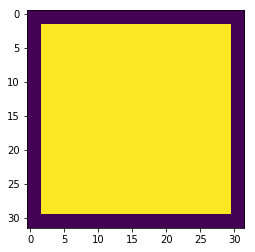

In [11]:
plt.imshow((padded>0).sum(axis=-1))

In [12]:
backward_weights=weights[::-1,::-1]

In [13]:
grads=forward(padded, backward_weights)

In [14]:
grads.shape

(30, 30, 1)

In [15]:
eps=1e-4

d_im=im.copy()
d_im[4,4]+=eps

In [16]:
d_out=forward(d_im, weights)
d_debug_out=np.sum(d_out*debug_weights)

In [17]:
grad=(d_debug_out-debug_out)/eps

In [18]:
grad

1.7115924799782078

In [19]:
grads[4,4]

array([ 1.71159248])